## Preprocessing

In [75]:
# data science libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# loading linear algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# tree based algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# machine learning processing and metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# deep learning
import tensorflow as tf

# h5 model
from keras.models import load_model

In [76]:
#  Import and read the charity_data.csv.
df = pd.read_csv("https://deeplearning-hw-booth.s3.us-west-2.amazonaws.com/charity_data.csv")
df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [77]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
df = df.drop(columns = ['EIN', 'NAME'])
df.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [79]:
# Determine the number of unique values in each column.
df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [80]:
# Look at APPLICATION_TYPE value counts for binning
df['APPLICATION_TYPE'].value_counts()

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

In [81]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

df2 = df.copy()

application_types_to_replace = ['T9', 'T13', 'T12', 'T2', 'T25', 'T14','T29','T15','T17']

# Replace in dataframe
for app in application_types_to_replace:
    df2['APPLICATION_TYPE'] = df2['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
df2['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [82]:
# Look at CLASSIFICATION value counts for binning
df2['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

In [83]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classi = pd.DataFrame(df2['CLASSIFICATION'].value_counts())
classi.loc[classi.CLASSIFICATION > 40]

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


In [84]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`

df3 = df2.copy()

classifications_to_replace = list(classi.loc[classi.CLASSIFICATION <= 40].index)

# Replace in dataframe
for cls in classifications_to_replace:
    df3['CLASSIFICATION'] = df3['CLASSIFICATION'].replace(cls,"Other")
    
# Check to make sure binning was successful
df3['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
Other      391
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
Name: CLASSIFICATION, dtype: int64

In [85]:
df3.head()

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [86]:
# Convert categorical data to numeric with `pd.get_dummies`
cols_oh = ["APPLICATION_TYPE", 'AFFILIATION', "CLASSIFICATION", "USE_CASE", "ORGANIZATION",
           "INCOME_AMT", "SPECIAL_CONSIDERATIONS"]

df_oh = pd.get_dummies(df3.loc[:, cols_oh])
print(df_oh.columns)

#drop one hot columns
df_oh2 = df_oh.drop(columns = ["APPLICATION_TYPE_T8","AFFILIATION_Regional", "CLASSIFICATION_Other", "USE_CASE_ProductDev", "ORGANIZATION_Trust", "INCOME_AMT_5M-10M", "SPECIAL_CONSIDERATIONS_Y"])

df_oh2.head()

Index(['APPLICATION_TYPE_Other', 'APPLICATION_TYPE_T10',
       'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3', 'APPLICATION_TYPE_T4',
       'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6', 'APPLICATION_TYPE_T7',
       'APPLICATION_TYPE_T8', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'AFFILIATION_Regional',
       'CLASSIFICATION_C1000', 'CLASSIFICATION_C1200', 'CLASSIFICATION_C1270',
       'CLASSIFICATION_C1280', 'CLASSIFICATION_C1300', 'CLASSIFICATION_C1700',
       'CLASSIFICATION_C2000', 'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700',
       'CLASSIFICATION_C2800', 'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000',
       'CLASSIFICATION_C5000', 'CLASSIFICATION_C7000', 'CLASSIFICATION_C7100',
       'CLASSIFICATION_Other', 'USE_CASE_CommunityServ', 'USE_CASE_Heathcare',
       'USE_CASE_Other', 'USE_CASE_Preservation', 'USE_CASE_ProductDev',
       'ORGANIZATION_Association', 'ORGANI

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,AFFILIATION_CompanySponsored,AFFILIATION_Family/Parent,...,ORGANIZATION_Corporation,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,SPECIAL_CONSIDERATIONS_N
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [87]:
#review numeric data
cols_num = ['STATUS', 'ASK_AMT', "IS_SUCCESSFUL"]
df_num = df3.loc[:, cols_num]
df_num.describe()

,STATUS,ASK_AMT,IS_SUCCESSFUL
count,34299.000000,3.429900e+04,34299.000000
mean,0.999854,2.769199e+06,0.532406
std,0.012073,8.713045e+07,0.498956
min,0.000000,5.000000e+03,0.000000
25%,1.000000,5.000000e+03,0.000000
50%,1.000000,5.000000e+03,1.000000
75%,1.000000,7.742000e+03,1.000000
max,1.000000,8.597806e+09,1.000000


In [88]:
#scale ASK_AMOUNT data
df_num["ASK_AMT"].values.reshape(-1, 1)
scaler = StandardScaler()
df_num["ASK_AMT"] = scaler.fit_transform(df_num["ASK_AMT"].values.reshape(-1, 1))
df_num.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL
0,1,-0.031725,1
1,1,-0.030536,1
2,1,-0.031725,0
3,1,-0.031706,1
4,1,-0.030146,1


In [89]:
df_clean = pd.concat([df_num, df_oh2], axis=1)
df_clean.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Corporation,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,SPECIAL_CONSIDERATIONS_N
0,1,-0.031725,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,-0.030536,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,-0.031725,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,-0.031706,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,-0.030146,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 47 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  float64
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  uint8  
 4   APPLICATION_TYPE_T10          34299 non-null  uint8  
 5   APPLICATION_TYPE_T19          34299 non-null  uint8  
 6   APPLICATION_TYPE_T3           34299 non-null  uint8  
 7   APPLICATION_TYPE_T4           34299 non-null  uint8  
 8   APPLICATION_TYPE_T5           34299 non-null  uint8  
 9   APPLICATION_TYPE_T6           34299 non-null  uint8  
 10  APPLICATION_TYPE_T7           34299 non-null  uint8  
 11  AFFILIATION_CompanySponsored  34299 non-null  uint8  
 12  AFFILIATION_Family/Parent     34299 non-null  uint8  
 13  A

In [91]:
# Split our preprocessed data into our features and target arrays
X = df_clean.drop(["IS_SUCCESSFUL"], axis=1).values
y = df_clean["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [92]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

### Model 1


In [93]:
#input number of features
num_input_features = len(X_train[0])
first_layer= 9
second_layer = 6

# Create the Keras Sequential model
nn_model1 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model1.add(tf.keras.layers.Dense(units=first_layer, activation="relu", input_dim=num_input_features))

#second layer
nn_model1.add(tf.keras.layers.Dense(units=second_layer, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
print(nn_model1.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 9)                 423       
                                                                 
 dense_22 (Dense)            (None, 6)                 60        
                                                                 
 dense_23 (Dense)            (None, 1)                 7         
                                                                 
Total params: 490
Trainable params: 490
Non-trainable params: 0
_________________________________________________________________
None


In [94]:
# Compile the Sequential model together and customize metrics
nn_model1.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model1.fit(X_train_scaled, y_train, epochs=50)


Epoch 1/50
804/804 [==============================] - 2s 2ms/step - loss: 0.6244 - accuracy: 0.6758
Epoch 2/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5653 - accuracy: 0.7265
Epoch 3/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5582 - accuracy: 0.7295
Epoch 4/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5553 - accuracy: 0.7313
Epoch 5/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5535 - accuracy: 0.7324
Epoch 6/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5523 - accuracy: 0.7332
Epoch 7/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5516 - accuracy: 0.7326
Epoch 8/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5507 - accuracy: 0.7330
Epoch 9/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5502 - accuracy: 0.7333
Epoch 10/50
804/804 [==============================] - 2s 2ms/step - loss: 0.5494 - accuracy: 0.7334

In [95]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model1.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5492 - accuracy: 0.7275 - 435ms/epoch - 2ms/step
Loss: 0.5491730570793152, Accuracy: 0.7274635434150696


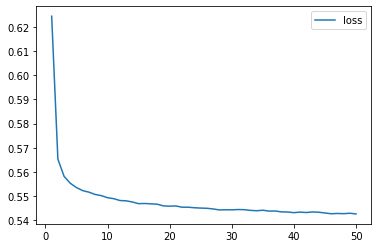

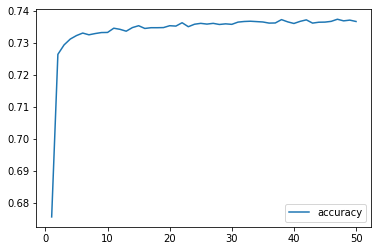

In [96]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

history_df.plot(y="accuracy")

In [97]:
nn_model1.save('AlphabetSoupCharity.h5')

### Model 2

In [98]:
#input number of features
num_input_features = len(X_train[0])
first_layer= 15
second_layer = 10

# Create the Keras Sequential model
nn_model2 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model2.add(tf.keras.layers.Dense(units=first_layer, activation="relu", input_dim=num_input_features))

#second layer
nn_model2.add(tf.keras.layers.Dense(units=second_layer, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
print(nn_model2.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 15)                705       
                                                                 
 dense_25 (Dense)            (None, 10)                160       
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 876
Trainable params: 876
Non-trainable params: 0
_________________________________________________________________
None


In [99]:
# Compile the Sequential model together and customize metrics
nn_model2.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model2.fit(X_train_scaled, y_train, epochs=75)

Epoch 1/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5901 - accuracy: 0.7060
Epoch 2/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5571 - accuracy: 0.7269
Epoch 3/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5534 - accuracy: 0.7306
Epoch 4/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5514 - accuracy: 0.7318
Epoch 5/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5505 - accuracy: 0.7314
Epoch 6/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5497 - accuracy: 0.7328
Epoch 7/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5488 - accuracy: 0.7328
Epoch 8/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5478 - accuracy: 0.7331
Epoch 9/75
804/804 [==============================] - 2s 3ms/step - loss: 0.5476 - accuracy: 0.7331
Epoch 10/75
804/804 [==============================] - 2s 2ms/step - loss: 0.5473 - accuracy: 0.7336

In [100]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model2.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5498 - accuracy: 0.7276 - 466ms/epoch - 2ms/step
Loss: 0.5497945547103882, Accuracy: 0.727580189704895


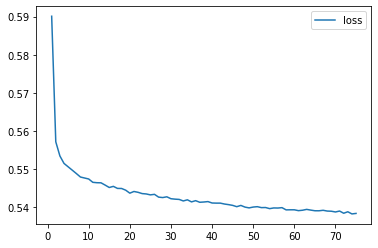

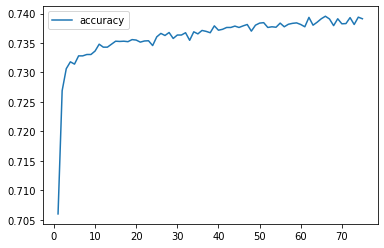

In [101]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

history_df.plot(y="accuracy")

### Model 3

In [114]:
#input number of features
num_input_features = len(X_train[0])
first_layer= 35
second_layer = 20
third_layer = 10

# Create the Keras Sequential model
nn_model3 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model3.add(tf.keras.layers.Dense(units=first_layer, activation="relu", input_dim=num_input_features))

#second layer
nn_model3.add(tf.keras.layers.Dense(units=second_layer, activation="relu"))

#third layer
nn_model3.add(tf.keras.layers.Dense(units=third_layer, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
print(nn_model3.summary())

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 35)                1120      
                                                                 
 dense_36 (Dense)            (None, 20)                720       
                                                                 
 dense_37 (Dense)            (None, 10)                210       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________
None


In [115]:
# Compile the Sequential model together and customize metrics
nn_model3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model3.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5909 - accuracy: 0.7173
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5714 - accuracy: 0.7258
Epoch 3/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5694 - accuracy: 0.7255
Epoch 4/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5687 - accuracy: 0.7257
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5677 - accuracy: 0.7271
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5665 - accuracy: 0.7272
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7284
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5664 - accuracy: 0.7276
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5661 - accuracy: 0.7281
Epoch 10/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5660 - accura

In [116]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model3.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5694 - accuracy: 0.7206 - 471ms/epoch - 2ms/step
Loss: 0.5693628787994385, Accuracy: 0.7205830812454224


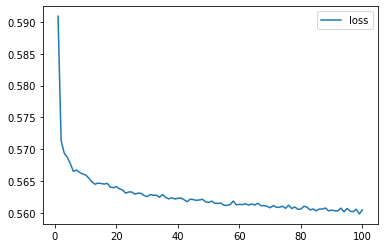

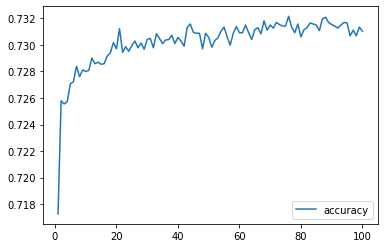

In [117]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

history_df.plot(y="accuracy")

In [118]:
#drop feature
df_clean.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,ORGANIZATION_Corporation,INCOME_AMT_0,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,SPECIAL_CONSIDERATIONS_N
0,1,-0.031725,1,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,1,-0.030536,1,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,-0.031725,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
3,1,-0.031706,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,1,-0.030146,1,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1


In [119]:
df_clean2 = df_clean.copy()
df_clean2.columns

Index(['STATUS', 'ASK_AMT', 'IS_SUCCESSFUL', 'APPLICATION_TYPE_Other',
       'APPLICATION_TYPE_T10', 'APPLICATION_TYPE_T19', 'APPLICATION_TYPE_T3',
       'APPLICATION_TYPE_T4', 'APPLICATION_TYPE_T5', 'APPLICATION_TYPE_T6',
       'APPLICATION_TYPE_T7', 'AFFILIATION_CompanySponsored',
       'AFFILIATION_Family/Parent', 'AFFILIATION_Independent',
       'AFFILIATION_National', 'AFFILIATION_Other', 'CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C1270', 'CLASSIFICATION_C1280',
       'CLASSIFICATION_C1300', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700', 'CLASSIFICATION_C2800',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000', 'CLASSIFICATION_C5000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_C7100',
       'USE_CASE_CommunityServ', 'USE_CASE_Heathcare', 'USE_CASE_Other',
       'USE_CASE_Preservation', 'ORGANIZATION_Association',
       'ORGANIZATION_Co-operative', 'ORGANIZATION_Corporation', 'INCOM

In [120]:
df_clean2 = df_clean2.drop(columns = ['CLASSIFICATION_C1000',
       'CLASSIFICATION_C1200', 'CLASSIFICATION_C1270', 'CLASSIFICATION_C1280',
       'CLASSIFICATION_C1300', 'CLASSIFICATION_C1700', 'CLASSIFICATION_C2000',
       'CLASSIFICATION_C2100', 'CLASSIFICATION_C2700', 'CLASSIFICATION_C2800',
       'CLASSIFICATION_C3000', 'CLASSIFICATION_C4000', 'CLASSIFICATION_C5000',
       'CLASSIFICATION_C7000', 'CLASSIFICATION_C7100'])
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  float64
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  uint8  
 4   APPLICATION_TYPE_T10          34299 non-null  uint8  
 5   APPLICATION_TYPE_T19          34299 non-null  uint8  
 6   APPLICATION_TYPE_T3           34299 non-null  uint8  
 7   APPLICATION_TYPE_T4           34299 non-null  uint8  
 8   APPLICATION_TYPE_T5           34299 non-null  uint8  
 9   APPLICATION_TYPE_T6           34299 non-null  uint8  
 10  APPLICATION_TYPE_T7           34299 non-null  uint8  
 11  AFFILIATION_CompanySponsored  34299 non-null  uint8  
 12  AFFILIATION_Family/Parent     34299 non-null  uint8  
 13  A

### Model 4

In [121]:
# Split our preprocessed data into our features and target arrays
X = df_clean2.drop(["IS_SUCCESSFUL"], axis=1).values
y = df_clean2["IS_SUCCESSFUL"].values

# Split the preprocessed data into a training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [122]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [128]:
#rerun model 3 on new data
#input number of features
num_input_features = len(X_train[0])
first_layer= 35
second_layer = 20
third_layer = 10

# Create the Keras Sequential model
nn_model4 = tf.keras.models.Sequential()

# Add our first Dense layer, including the input layer
nn_model4.add(tf.keras.layers.Dense(units=first_layer, activation="relu", input_dim=num_input_features))

#second layer
nn_model4.add(tf.keras.layers.Dense(units=second_layer, activation="tanh"))

#third layer
nn_model4.add(tf.keras.layers.Dense(units=third_layer, activation="relu"))

# Add the output layer that uses a probability activation function
nn_model4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the Sequential model
print(nn_model4.summary())

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 35)                1120      
                                                                 
 dense_44 (Dense)            (None, 20)                720       
                                                                 
 dense_45 (Dense)            (None, 10)                210       
                                                                 
 dense_46 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,061
Trainable params: 2,061
Non-trainable params: 0
_________________________________________________________________
None


In [129]:
# Compile the Sequential model together and customize metrics
nn_model4.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
fit_model = nn_model4.fit(X_train_scaled, y_train, epochs=250)

Epoch 1/250
804/804 [==============================] - 5s 4ms/step - loss: 0.5807 - accuracy: 0.7193
Epoch 2/250
804/804 [==============================] - 3s 3ms/step - loss: 0.5704 - accuracy: 0.7262
Epoch 3/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5688 - accuracy: 0.7276
Epoch 4/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5680 - accuracy: 0.7266
Epoch 5/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.7267
Epoch 6/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5674 - accuracy: 0.7280
Epoch 7/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5669 - accuracy: 0.7273
Epoch 8/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7263
Epoch 9/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5661 - accuracy: 0.7285
Epoch 10/250
804/804 [==============================] - 2s 2ms/step - loss: 0.5661 - accura

In [130]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model4.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5714 - accuracy: 0.7221 - 496ms/epoch - 2ms/step
Loss: 0.5714210867881775, Accuracy: 0.7220991253852844


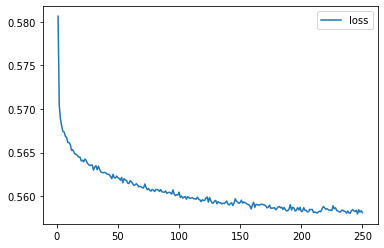

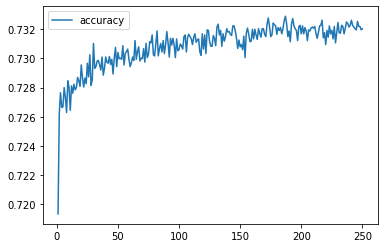

In [134]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the accuracy
history_df.plot(y="loss")

history_df.plot(y="accuracy")

In [133]:
nn_model4.save('AlphabetSoupCharity_Optimization.h5')